<img src="mioti.png" style="height: 100px">
<center style="color:#888">Data Science with Python </center>

# DSPy1. NumPy basics. Challenge

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Basic-slicing" data-toc-modified-id="Basic-slicing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Basic slicing</a></span></li><li><span><a href="#A-bit-more-of-slicing" data-toc-modified-id="A-bit-more-of-slicing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>A bit more of slicing</a></span></li><li><span><a href="#Working-with-pics" data-toc-modified-id="Working-with-pics-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Working with pics</a></span><ul class="toc-item"><li><span><a href="#Aplicando-filtros-a-imagenes" data-toc-modified-id="Aplicando-filtros-a-imagenes-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Aplicando filtros a imagenes</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np

## Basic slicing

<img src="slicing.png" style="height: 200px">

Dado el siguiente array 2d:

In [14]:
array2d = np.arange(9).reshape(3,3)
array2d

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

Selecciona cada una de las zonas sombreadas en la imagen superior:

In [15]:
# Upper-right square
upper_right = array2d[[0,1], 1:]
print("Upper-right square:")
print(upper_right)


Upper-right square:
[[1 2]
 [4 5]]


In [16]:
# Last row
last_row = array2d[2, :]
print("Last row:")
print(last_row)

Last row:
[6 7 8]


In [17]:
# Middle row without last column
middle_row = array2d[1, :-1]
print("Middle row without last column:")
print(middle_row)


Middle row without last column:
[3 4]


In [18]:
# Middle row without last column

## A bit more of slicing

* Crea una matriz tamaño n x m de todo ceros, rodeada de 1s. 

In [19]:
n = 4
m = 9

* Crea una matriz con patrón de tablero de ajedrez. Las casillas negras serán 0, las blancas 1.
<img src="chess.png" style="height: 300px">


In [21]:
# 8x8 chess board pattern
import itertools
n = 8
chess_board = np.zeros((n, n)).astype(int)

# Fill alternating squares with 1s
for i, j in itertools.product(range(n), range(n)):
    if (i + j) % 2 == 0:
        chess_board[int(i), int(j)] = 1

print("Chess board pattern:")
print(chess_board)


Chess board pattern:
[[1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]]


## Working with pics

El siguiente código carga una imagen y la convierte en un array multidimensional:

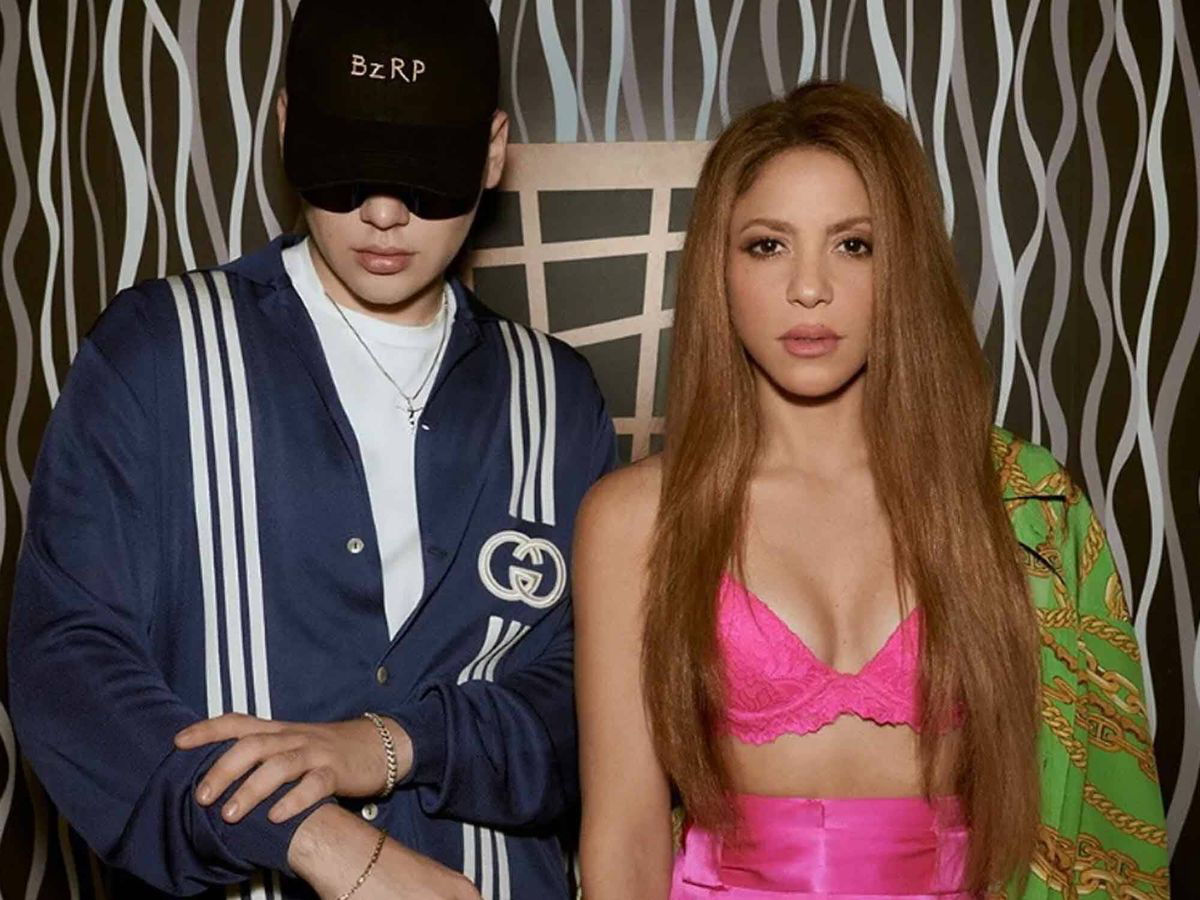

In [116]:
import imageio.v2 as imageio
import PIL

# Reads the image into RGB numpy array
img = imageio.imread('shakira_bizarrap.jpg')

# Shows the numpy array as a picture
PIL.Image.fromarray(img)

Antes de trabajar con las transformaciones, es importante que comprobéis que tipo de formato de dato contiene el array de la imagen, ya que PIL solo permite trabajar con ese formato.

* ¿Cómo podríamos aplicarle un tinte verde a la imagen?

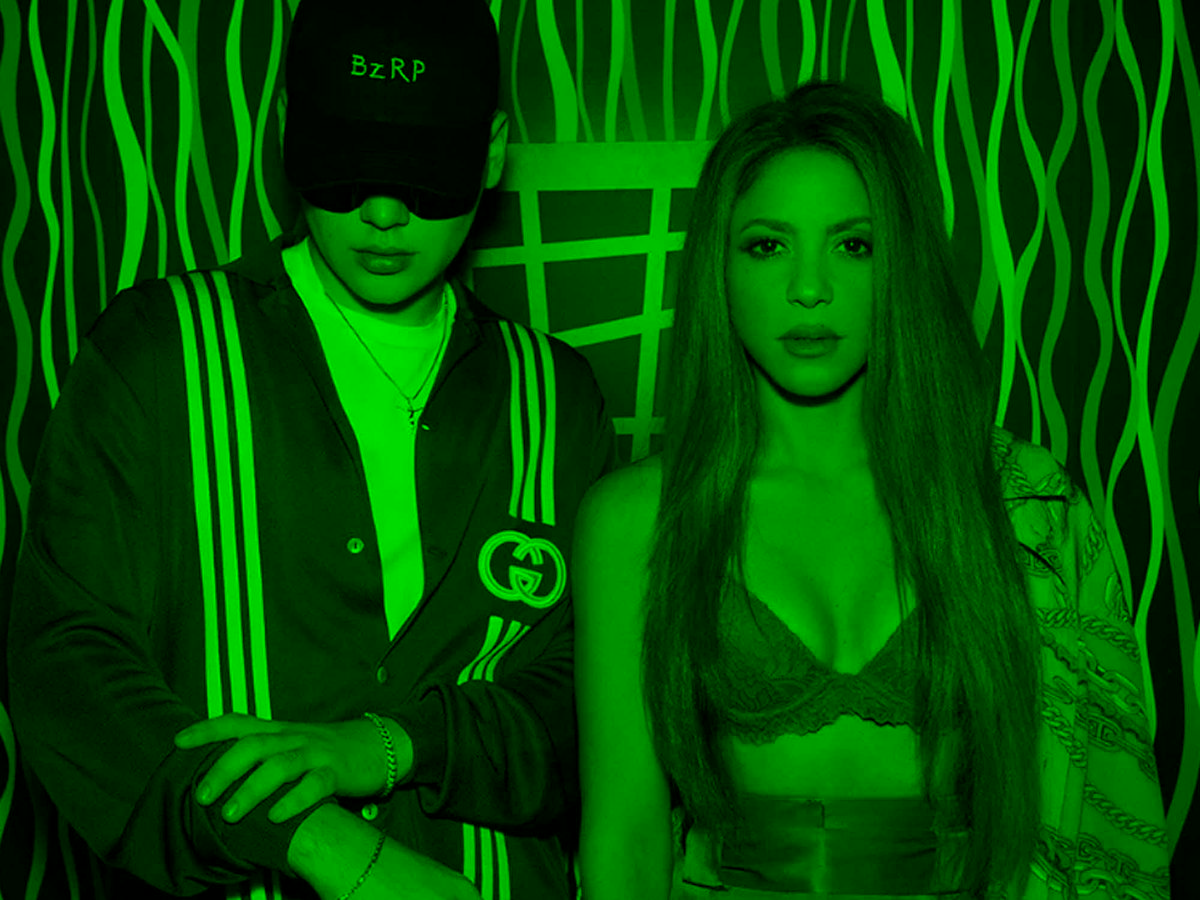

In [ ]:
if len(img.shape) == 2:  # Check if image is grayscale
    img = np.stack((img,)*3, axis=-1)  # Convert to RGB by stacking 3 channels

# Now create green tint
green_tint = img.copy()
green_tint[:,:,0] = 0  # Red channel
green_tint[:,:,2] = 0  # Blue channel

# Display the green-tinted image
PIL.Image.fromarray(green_tint)


* ¿Cómo la convertiríamos a escala de grises? (sin usar funciones... ¡operando con el array!)

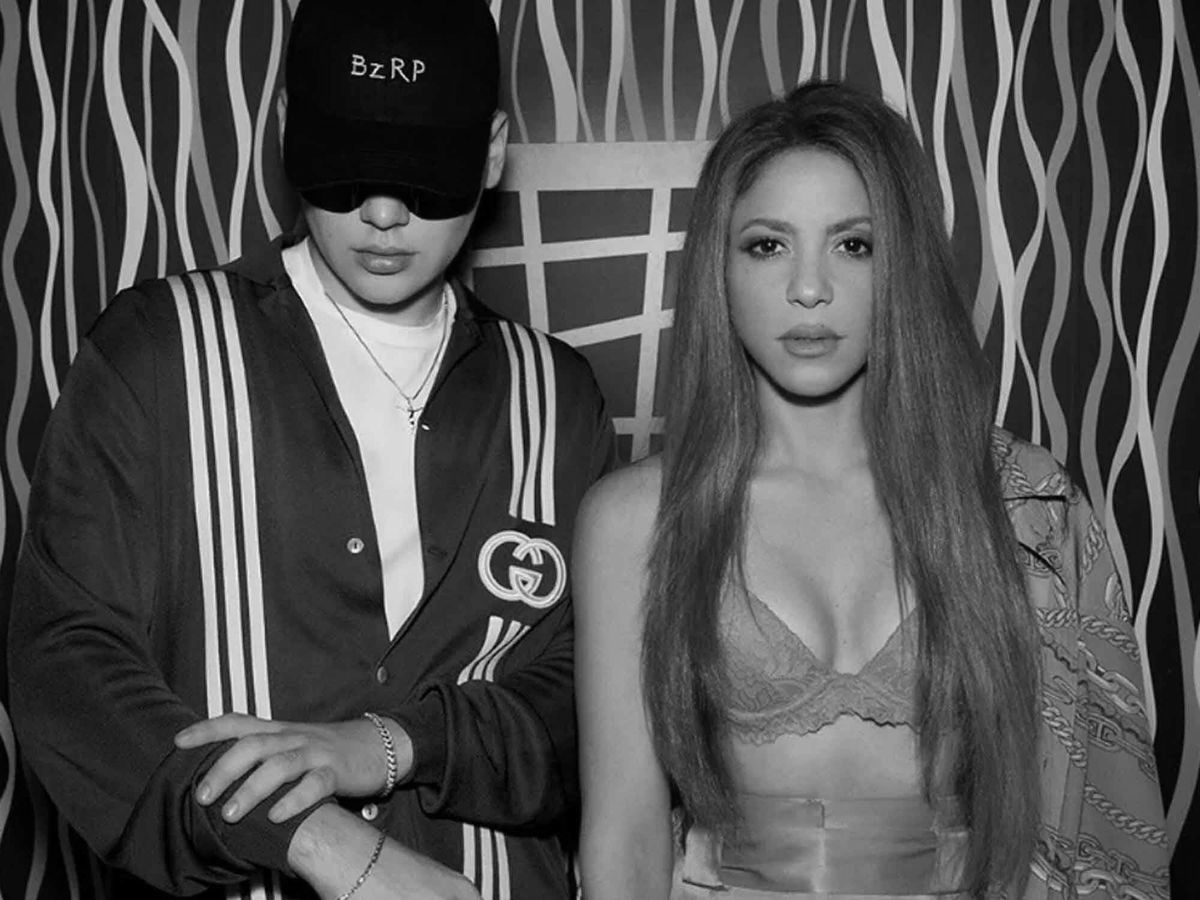

In [30]:
grayscale = img[:,:,0] * 0.2989 + img[:,:,1] * 0.5870 + img[:,:,2] * 0.1140
grayscale = grayscale.astype(np.uint8)  # Convert back to uint8

# Display grayscale image
PIL.Image.fromarray(grayscale, mode='L')


* Recorta la imagen para quedarse de manera aproximada con la region donde se encuentra la cara de ambos:

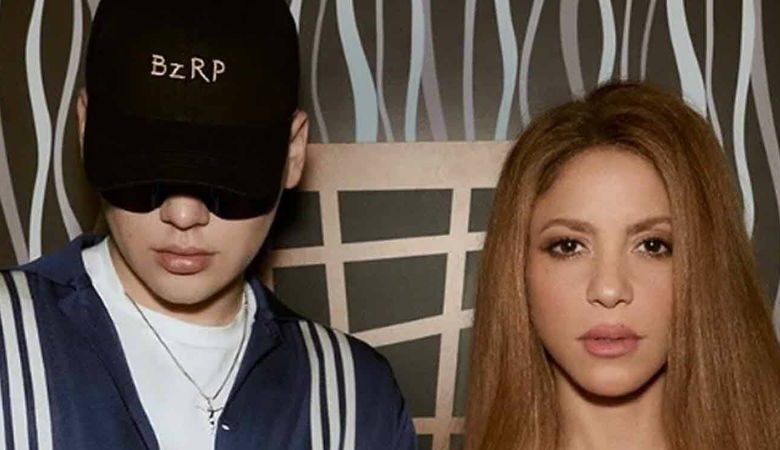

In [ ]:
# Approximate coordinates for faces region
faces = img[:450, 200:980]

# Display cropped image
PIL.Image.fromarray(faces)


* Aplica a la imagen una rotación de 180 grados:

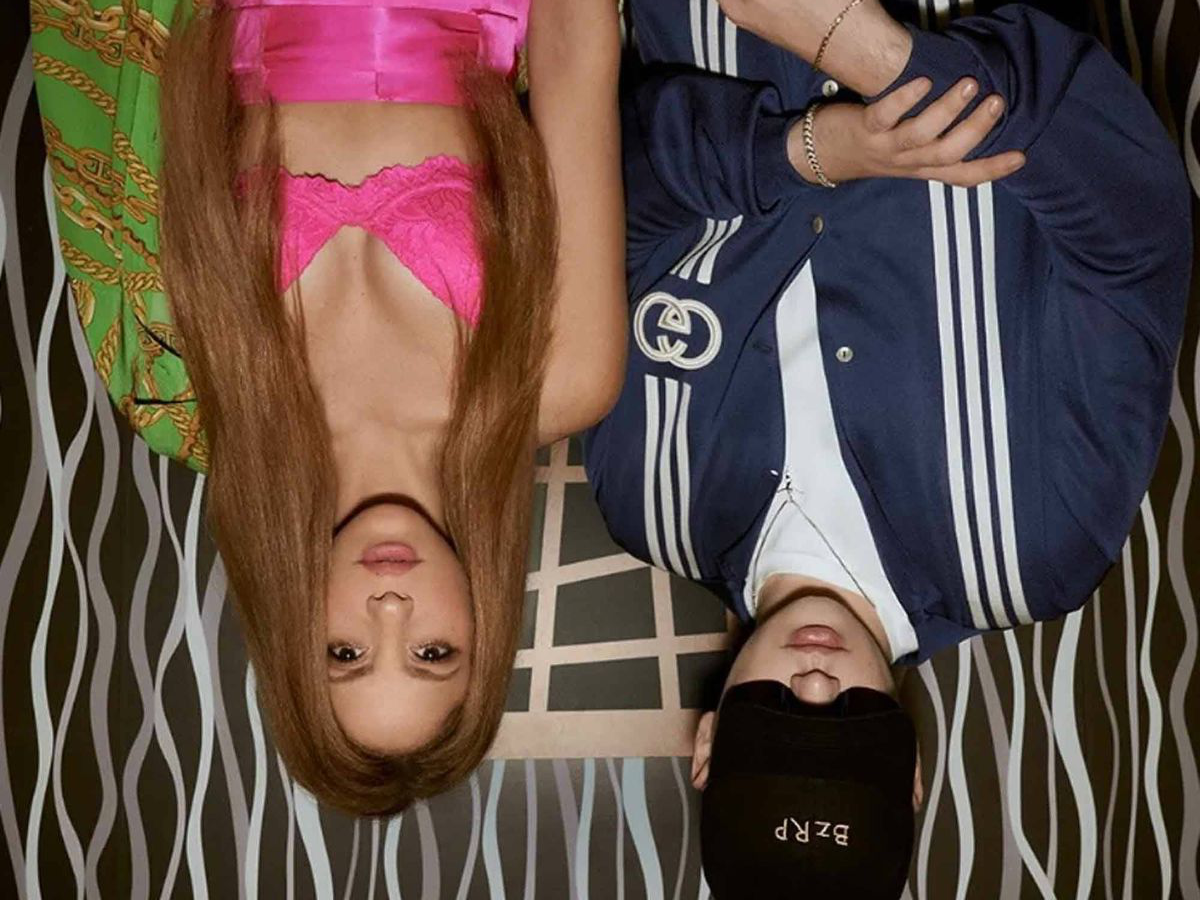

In [45]:
# Rotate image 180 degrees by flipping both horizontally and vertically
rotated = np.flipud(np.fliplr(img))

# Display rotated image
PIL.Image.fromarray(rotated)


* Genera una imagen que corresponda a la bandera de España

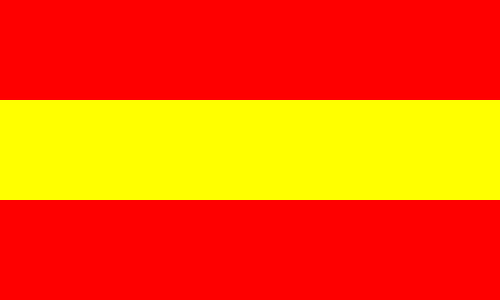

In [48]:
# Empty array with dimensions for flag (3 stripes)
spain_flag = np.zeros((300, 500, 3), dtype=np.uint8)

# Red stripes (top and bottom)
spain_flag[0:100,:] = [255, 0, 0]  # Top red stripe
spain_flag[200:300,:] = [255, 0, 0]  # Bottom red stripe

# Yellow stripe (middle)
spain_flag[100:200,:] = [255, 255, 0]  # Middle yellow stripe

# Display the flag
PIL.Image.fromarray(spain_flag)


* Y la de Japón ....:

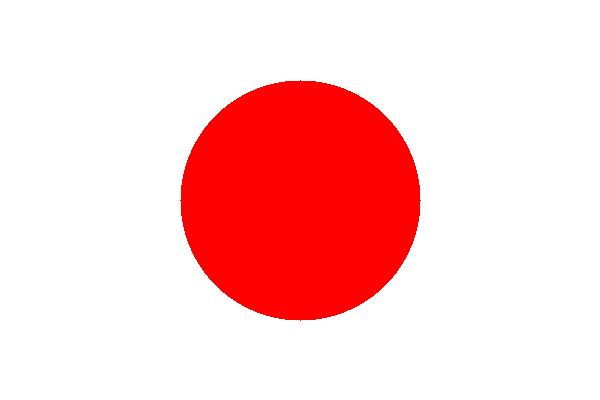

In [49]:
# Create white background
japan_flag = np.ones((400, 600, 3), dtype=np.uint8) * 255

# Create red circle in center
center_y, center_x = japan_flag.shape[0]//2, japan_flag.shape[1]//2
radius = 120

y, x = np.ogrid[:japan_flag.shape[0], :japan_flag.shape[1]]
dist_from_center = np.sqrt((x - center_x)**2 + (y - center_y)**2)

# Set red circle
circle_mask = dist_from_center <= radius
japan_flag[circle_mask] = [255, 0, 0]

# Display the flag
PIL.Image.fromarray(japan_flag)


* Reconstruye la siguiente imagen. Para ello tienes que generar una función que coja como párametro un valor en el cual quieres ir sampleando la imagen a lo largo de las columnas (las filas no sé han modificado) y devuelva la únion de todas esas muestras (la frecuencia correcta de sampleo para reconstruir la imágen es un multiplo de 2).

/var/folders/g9/6x9nn3557t9b869yv8801prr0000gn/T/ipykernel_48944/3315266893.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_modified = imageio.imread('Modified.png')


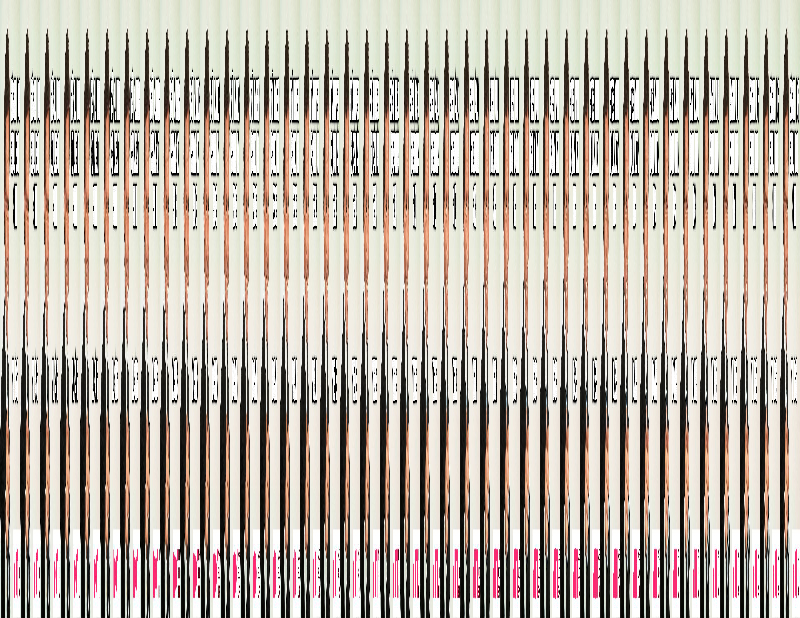

In [ ]:
# Reads the image into RGB numpy array
img_modified = imageio.imread('Modified.png')
PIL.Image.fromarray(img_modified)

# Result:

/var/folders/g9/6x9nn3557t9b869yv8801prr0000gn/T/ipykernel_48944/2326949290.py:29: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_modified = imageio.imread("Modified.png")


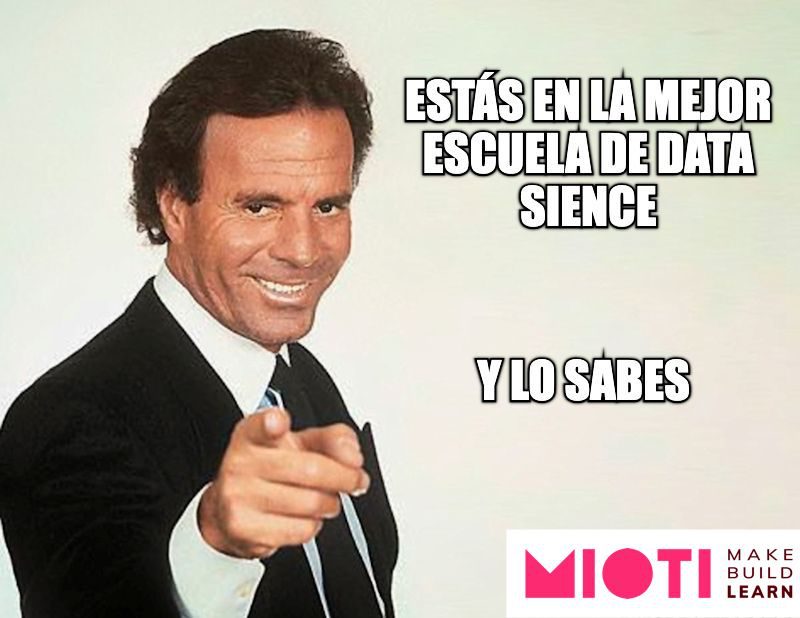

In [102]:
import numpy as np
from PIL import Image
import imageio

def rearrange_columns_blocks(img_np, frequency):
    """
    Reconstructs an image by rearranging columns in blocks.

    Parameters:
    - img_np: image as numpy array.
    - frequency: number of blocks the image was originally divided into.

    Returns:
    - reconstructed image as numpy array.
    """
    height, width, channels = img_np.shape
    columns_per_block = width // frequency
    new_image = np.zeros_like(img_np)

    for i in range(frequency):
        for j in range(columns_per_block):
            source_index = j * frequency + i
            if source_index < width:
                new_image[:, i * columns_per_block + j] = img_np[:, source_index]

    return new_image

# Read image
img_modified = imageio.imread("Modified.png")

# Try reconstruction with frequency = 2, 4, 8...
reconstructed_img = rearrange_columns_blocks(img_modified, frequency=20)

# Show image
PIL.Image.fromarray(reconstructed_img)

### Aplicando filtros a imagenes

Los algoritmos de computer vision realizan un filtrado de las imágenes para quedarse con sus principales características y para crear de una misma imagen un conjunto más amplio con el que entrenar al modelo. En este ejercicio se pide aplicar el filtrado de la media (para difuminar una imagen) y la mediana (para disminuir el ruido). Más información acerca de los diferente tipos de filtros [aqui](https://medium.com/image-vision/noise-filtering-in-digital-image-processing-d12b5266847c).

* Primero vamos aplicar el filtro de la media a la imagen original de Shakira y Bizarrap. Para ello tenemos que ir recorriendo cada pixel de la imagen y generando una ventana (kernel) de tamaño n (el tamaño de la ventana va a ser simétrico en las dos dimensiones) que este centrada en el pixel, calcule la media de los elementos en esa ventana y reemplace el valor original del pixel por la media. En este ejemplo tendriamos una ventana de 3x3:
<br/>
<img src="mean_filter.png" style="width: 600px">

In [135]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

def apply_filter(n, imagen_name, filter_type):
    """
    Apply mean or median filter to an image
    
    Parameters:
    - n: size of the filter window
    - imagen_name: path to the image file
    - filter_type: 'mean' or 'median'
    
    Returns:
    - filtered image as numpy array
    """
    img = imageio.imread(imagen_name)

    # Convert to grayscale if RGB
    if len(img.shape) == 3:
        img = np.mean(img, axis=2).astype(np.uint8)

    filtered_img = np.copy(img)
    offset = n // 2

    for i in range(offset, img.shape[0] - offset):
        for j in range(offset, img.shape[1] - offset):
            window = img[i - offset:i + offset + 1, j - offset:j + offset + 1]
            if filter_type == 'mean':
                filtered_img[i, j] = np.mean(window)
            elif filter_type == 'median':
                filtered_img[i, j] = np.median(window)
            else:
                raise ValueError("filter_type must be 'mean' or 'median'")

    return filtered_img


/var/folders/g9/6x9nn3557t9b869yv8801prr0000gn/T/ipykernel_48944/3061787019.py:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(imagen_name)


In [137]:
def plot_filter_comparison(imagen_path, filter_type="mean"):
    """
    Plot comparison between original image and filtered version
    
    Parameters:
    - imagen_path: path to the image file
    - filter_type: 'mean' or 'median'
    """
    # Apply selected filter
    if filter_type == "mean":
        filtered_img = apply_filter(3, imagen_path, "mean")
        filter_title = "Filtro de la media"
    elif filter_type == "median":
        filtered_img = apply_filter(3, imagen_path, "median") 
        filter_title = "Filtro de la mediana"
    else:
        raise ValueError("filter_type must be 'mean' or 'median'")

    # Convert original to grayscale
    original = imageio.imread(imagen_path)
    if len(original.shape) == 3:
        original = np.mean(original, axis=2).astype(np.uint8)
        
    # Plot results
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    axs[0].imshow(original, cmap='gray')
    axs[0].set_title("Original")
    axs[0].axis('off')

    axs[1].imshow(filtered_img, cmap='gray')
    axs[1].set_title(filter_title)
    axs[1].axis('off')

    plt.show()


# Result image Shakira and Bizarrap

/var/folders/g9/6x9nn3557t9b869yv8801prr0000gn/T/ipykernel_48944/3061787019.py:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(imagen_name)
/var/folders/g9/6x9nn3557t9b869yv8801prr0000gn/T/ipykernel_48944/339662601.py:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  original = imageio.imread(imagen_path)


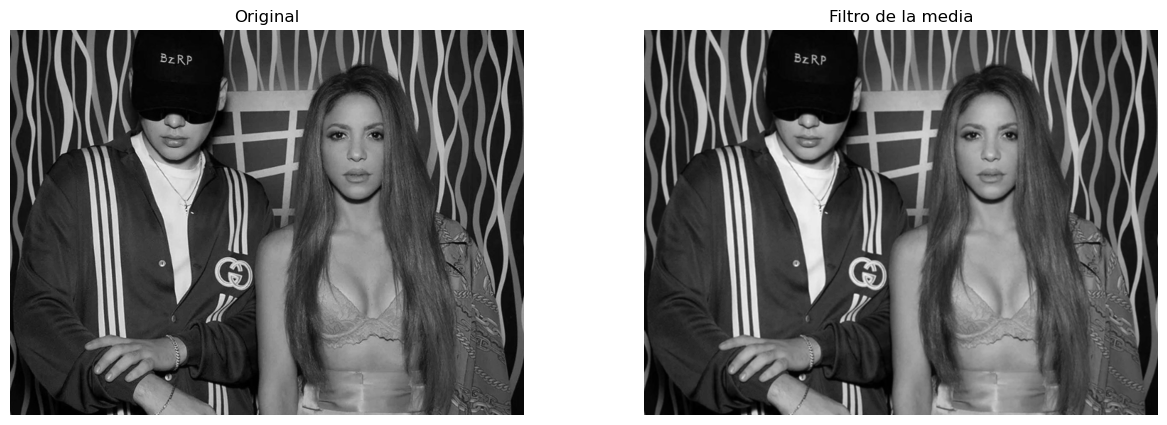

In [138]:
plot_filter_comparison('shakira_bizarrap.jpg', 'mean')

* El filtro de la mediana lo vamos a aplicar sobre una imagen en escala de grises que tiene simulado una gran cantidad de ruido. Este es el ejemplo de como actuaría el filtro de la mediana sobre un pixel y con una ventana de tamaño 3.
<br/>
<img src="median_filter.png" style="width: 600px">

# Result Noise Image

/var/folders/g9/6x9nn3557t9b869yv8801prr0000gn/T/ipykernel_48944/3061787019.py:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(imagen_name)
/var/folders/g9/6x9nn3557t9b869yv8801prr0000gn/T/ipykernel_48944/339662601.py:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  original = imageio.imread(imagen_path)


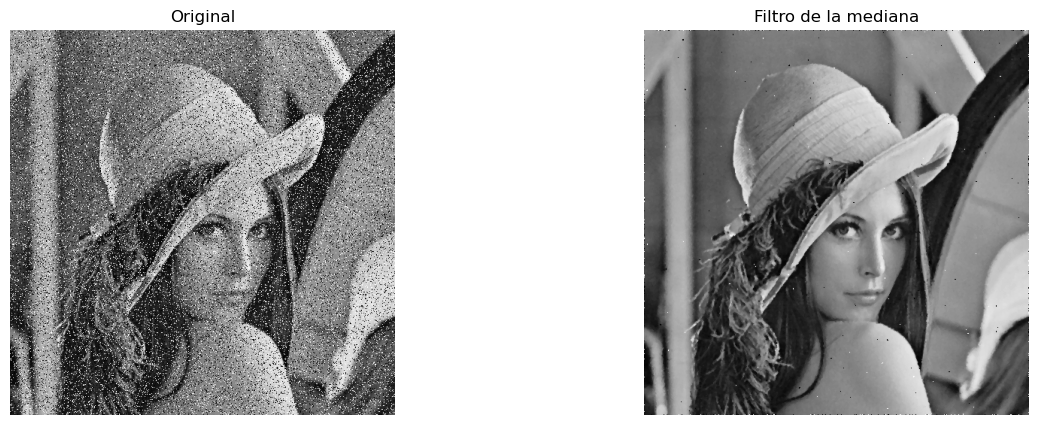

In [ ]:
plot_filter_comparison('noise.png', 'median')